
# Text Classification using Naive Bayes and Support Vector Machine
## Aim: To classify the Product News and Stock Commentary News
### Dataset: https://www.kaggle.com/datasets/sulphatet/twitter-financial-news

#### Classifiaction of News:
* 0 - PRODUCT NEWS
* 1-  STOCK COMMENTARY

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import re
import time
import pickle
from sklearn.model_selection import train_test_split
nltk.download('stopwords')

nltk.download('punkt')

nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
train_data =pd.read_csv("train_data.csv")
train_data.head()

,text,label
0,$HOUR flagging here below the squeeze level to...,1
1,$SPY closed just above 2 mo channel &amp; 10d ...,1
2,$VLCN going green.....,1
3,$QQQ - QQQ: It's Make It Or Break It For The S...,1
4,Nike college apparel will have 'faster speed t...,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5663 entries, 0 to 5662
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5663 non-null   object
 1   label   5663 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 88.6+ KB


In [ ]:
train_data.isna().sum()

text     0
label    0
dtype: int64

In [ ]:
train_data["label"].value_counts()

0    3545
1    2118
Name: label, dtype: int64

In [ ]:
for i in range(1,5):
    random_ind = random.randint(0,len(train_data))
    print(str(train_data["text"][random_ind]),end="\nLabel: ")
    print(str(train_data["label"][random_ind]),end="\n\n")

Wolters Kluwer Compliance Solutions Hosts Digital Banking Assets Informational Webinar  https://t.co/JhHoOfNzam  https://t.co/BAUKwvRMVB
Label: 0

Medallion Introduces Continuing Education (CE) Tracking to Provide End-to-End License Management to Provider Networks  https://t.co/GMbF6Pra5j
Label: 0

$STXS: Stereotaxis announced the CE Mark submission for its MAGiC catheter  https://t.co/Kf6ldEz4Kq
Label: 0

Netcracker Receives Top Ranking in Telco Republic’s Next-Generation Telecom Operations and Business Support Systems Market Assessment  https://t.co/R5RZ3F2eFp  https://t.co/UeE7jxxeqU
Label: 0



## Most Frequently occuring words in the news sections

In [ ]:
product =nltk.FreqDist(word for text in train_data[train_data["label"]==0]["text"] for word in text.lower().split())
stock =nltk.FreqDist(word for text in train_data[train_data["label"]==1]["text"] for word in text.lower().split())


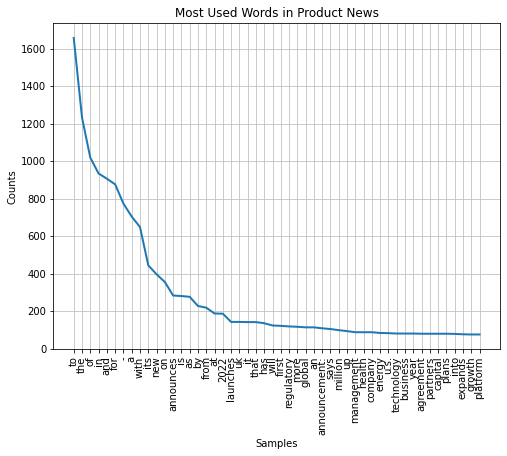

In [ ]:
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Product News")
product.plot(50)
plt.show()

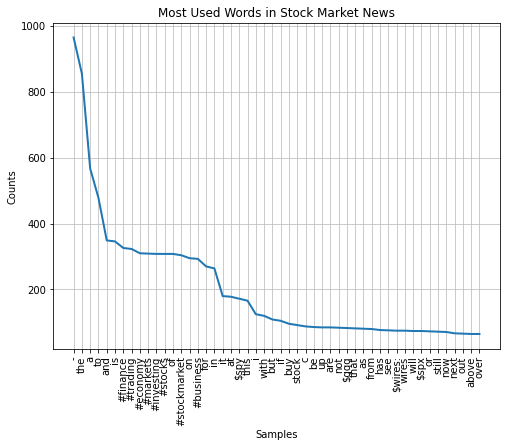

In [ ]:
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Stock Market News")
stock.plot(50)
plt.show()

## Preprocessing

In [ ]:
cleaned_train_data = []
lemma =WordNetLemmatizer()
stopwords =stopwords.words("english")
for text in train_data["text"]:
  text  = re.sub(r"https\S+", "", text) # removing links
  text = re.sub("[^a-zA-Z0-9]", " ", text) # including only alphabets and numericals
  text = nltk.word_tokenize(text.lower()) # tokenization
  text = [lemma.lemmatize(word) for word in text] # lemmatization
  text = [word for word in text if word not in stopwords] # stopwords
  text = " ".join(text)
  cleaned_train_data.append(text)

In [ ]:
for i in range(0,5):
  print(cleaned_train_data[i], end= "\n\n")

hour flagging squeeze level accumulate b4 spike still high alert low float short squeeze play

spy closed 2 mo channel amp 10d next 400 qqq closed 1 mo desc tl see consolidate sideways continue th z fri core pce 5 30 u mkt closed 6 1 fed qt start 6 2 crwd

vlcn going green

qqq qqq make break summer rally market economy trading

nike college apparel faster speed market new deal joshschafer



## Creating BoW

In [ ]:
vectorizer = CountVectorizer(max_features =1000)
BoW = vectorizer.fit_transform(cleaned_train_data)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(BoW, np.asarray(cleaned_train_data))

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4247, 1000), (1416, 1000), (4247,), (1416,))

In [ ]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(x_train, y_train)

SVC()

In [ ]:
predictions = model1.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy of SVM model is {}%".format(accuracy_score(y_test,predictions)))

Accuracy of SVM model is 0.0748587570621469%


In [ ]:
from sklearn import naive_bayes
Naive = naive_bayes.MultinomialNB()
Naive.fit(x_train, y_train)
# predict the labels on validation dataset
predictions_NB = Naive.predict(x_test)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, y_test)*100)

Naive Bayes Accuracy Score ->  6.002824858757062


# Using  TF-IDF vectorizer

In [ ]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
data =pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train_data.csv")

In [ ]:
data["text"].dropna(inplace=True)
data["text_original"] = data["text"]
data["text"] = [entry.lower() for entry in data["text"]]
data["text"] = [word_tokenize(entry) for entry in data["text"]]
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
data.head()


,text,label,text_original
0,"[$, hour, flagging, here, below, the, squeeze,...",1,$HOUR flagging here below the squeeze level to...
1,"[$, spy, closed, just, above, 2, mo, channel, ...",1,$SPY closed just above 2 mo channel &amp; 10d ...
2,"[$, vlcn, going, green, .....]",1,$VLCN going green.....
3,"[$, qqq, -, qqq, :, it, 's, make, it, or, brea...",1,$QQQ - QQQ: It's Make It Or Break It For The S...
4,"[nike, college, apparel, will, have, 'faster, ...",0,Nike college apparel will have 'faster speed t...


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
for index,entry in enumerate(data["text"]):
  final_words = []
  word_lemmatized =WordNetLemmatizer()
  for word, tag in pos_tag(entry):
    if word not in stopwords.words("english") and word.isalpha():
      word_final = word_lemmatized.lemmatize(word, tag_map[tag[0]])
      final_words.append(word_final)
  data.loc[index, "text_final"] = str(final_words)


In [ ]:
data.head()

,text,label,text_original,text_final
0,"[$, hour, flagging, here, below, the, squeeze,...",1,$HOUR flagging here below the squeeze level to...,"['hour', 'flagging', 'squeeze', 'level', 'accu..."
1,"[$, spy, closed, just, above, 2, mo, channel, ...",1,$SPY closed just above 2 mo channel &amp; 10d ...,"['spy', 'closed', 'mo', 'channel', 'amp', 'nex..."
2,"[$, vlcn, going, green, .....]",1,$VLCN going green.....,"['vlcn', 'going', 'green']"
3,"[$, qqq, -, qqq, :, it, 's, make, it, or, brea...",1,$QQQ - QQQ: It's Make It Or Break It For The S...,"['qqq', 'qqq', 'make', 'break', 'summer', 'ral..."
4,"[nike, college, apparel, will, have, 'faster, ...",0,Nike college apparel will have 'faster speed t...,"['nike', 'college', 'apparel', 'speed', 'marke..."


In [ ]:
data = data.drop(["text"], axis=1)
data.head()

,label,text_original,text_final
0,1,$HOUR flagging here below the squeeze level to...,"['hour', 'flagging', 'squeeze', 'level', 'accu..."
1,1,$SPY closed just above 2 mo channel &amp; 10d ...,"['spy', 'closed', 'mo', 'channel', 'amp', 'nex..."
2,1,$VLCN going green.....,"['vlcn', 'going', 'green']"
3,1,$QQQ - QQQ: It's Make It Or Break It For The S...,"['qqq', 'qqq', 'make', 'break', 'summer', 'ral..."
4,0,Nike college apparel will have 'faster speed t...,"['nike', 'college', 'apparel', 'speed', 'marke..."


In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(data["text_final"], data["label"], test_size =0.3)


In [ ]:
x_train1.shape, x_test1.shape, y_train1.shape, y_test1.shape

((3964,), (1699,), (3964,), (1699,))

In [ ]:
tfidf_vector = TfidfVectorizer(max_features=1000)
tfidf_vector.fit(data["text_final"])
x_train1 = tfidf_vector.transform(x_train1)
x_test1 = tfidf_vector.transform(x_test1)


In [ ]:
Naive_bayes = naive_bayes.MultinomialNB()
Naive_bayes.fit(x_train1, y_train1)
predict_NB = Naive_bayes.predict(x_test1)
print("Accuracy-Naive Bayes: ", accuracy_score(predict_NB, y_test1)*100)
print(classification_report(y_test1, predict_NB))

Accuracy-Naive Bayes:  92.64273101824602
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1079
           1       0.91      0.89      0.90       620

    accuracy                           0.93      1699
   macro avg       0.92      0.92      0.92      1699
weighted avg       0.93      0.93      0.93      1699



In [ ]:
SVM_classifier = svm.SVC()
SVM_classifier.fit(x_train1, y_train1)
predict_svm = SVM_classifier.predict(x_test1)
print("Accuracy-SVM: ", accuracy_score(predict_svm, y_test1)*100)
print(classification_report(y_test1, predict_svm))

Accuracy-SVM:  95.05591524426134
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1079
           1       0.94      0.92      0.93       620

    accuracy                           0.95      1699
   macro avg       0.95      0.94      0.95      1699
weighted avg       0.95      0.95      0.95      1699



# Conclusion:
### We have used the Product news and Stock Commentary news for the classification. After preprocessing the text data, we have converted the texts to vectors using both BoW and TF-IDF.  The classification is done using support Vector Machines and Naive Bayes Classifier. The obtained results for the BoW vectorizer is 6% for the SVM model and the for the naive Bayes the results are unreliable. When we used the TF-IDF vectorizer, the results obtained were 92% for the naive bayes and 95% for the support vector machine.

In [ ]:
tfidf_vectorizer =TfidfVectorizer(max_features=100)
vectors =tfidf_vectorizer.fit_transform(cleaned_train_data)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(vectors, train_data["label"])

In [ ]:
Naive_bayes = naive_bayes.MultinomialNB()
Naive_bayes.fit(x_train, y_train)
predict_NB = Naive_bayes.predict(x_test)


In [ ]:
print("Accuracy-Naive Bayes: ", accuracy_score(predict_NB, y_test)*100)


Accuracy-Naive Bayes:  85.87570621468926


In [ ]:
print(classification_report(y_test, predict_NB))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       912
           1       0.85      0.73      0.79       504

    accuracy                           0.86      1416
   macro avg       0.86      0.83      0.84      1416
weighted avg       0.86      0.86      0.86      1416

